In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [6]:
df.isna().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.columns

Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
int_types = ['uint8', 'int8', 'int16']
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [10]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 277.1 KB


In [11]:
for dtype in ['float', 'int', 'object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep = True).mean()
    mean_usage_mb = mean_usage_b / 1024
    print("Average memory usage for {} columns: {:03.3f} KB".format(dtype, mean_usage_mb))

Average memory usage for float columns: 0.125 KB
Average memory usage for int columns: 3.973 KB
Average memory usage for object columns: 31.674 KB


C:\Users\Scare\AppData\Local\Temp\ipykernel_18360\3112785254.py:3: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [12]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep = True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep = True)
    usage_mb = usage_b / 1024
    return "{:03.3f} KB".format(usage_mb)

In [13]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(df_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

23.836 KB
7.831 KB


,before,after
uint8,NaN,1.0
uint16,NaN,2.0
uint32,NaN,2.0
int64,5.0,NaN


In [14]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_int.apply(pd.to_numeric,downcast='float')

print(mem_usage(df_float))
print(mem_usage(converted_float))

compare_ints = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

0.125 KB
11.980 KB


C:\Users\Scare\AppData\Local\Temp\ipykernel_18360\2050051988.py:3: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



,before,after
float32,NaN,5


In [15]:
optimized_df = df.copy()

optimized_df[converted_int.columns] = converted_int


print(mem_usage(df))
print(mem_usage(optimized_df))

277.104 KB
261.099 KB


In [16]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe().T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [17]:
converted_obj = pd.DataFrame()
for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [18]:
print(mem_usage(df_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

253.393 KB
23.016 KB


,before,after
object,7.0,NaN
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0


In [19]:
optimized_df[converted_obj.columns] = converted_obj
mem_usage(optimized_df)

'30.722 KB'

In [20]:
#df = optimized_df

In [21]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 277.1 KB


In [22]:
df.sample(10)

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
18,18,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
456,456,2022,SE,FT,Data Engineer,105000,USD,105000,US,100,US,M
509,509,2022,MI,FT,Applied Data Scientist,157000,USD,157000,US,100,US,L
96,96,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
139,139,2021,EN,FT,Data Scientist,80000,USD,80000,US,100,US,M
425,425,2022,MI,FT,Data Engineer,82900,USD,82900,US,0,US,M
145,145,2021,SE,FT,Machine Learning Engineer,70000,EUR,82744,BE,50,BE,M
156,156,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
281,281,2021,EN,FT,Research Scientist,100000,USD,100000,JE,0,CN,L
573,573,2022,SE,FT,Data Analyst,69000,USD,69000,US,100,US,M


In [23]:
def checkEqual(x,y):
    if (x == y):
        return 1
    else :
        return 0

df['WorkAtMotherland'] = df.apply(lambda row: checkEqual(row.employee_residence,row.company_location), axis = 1)

In [24]:
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,WorkAtMotherland
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1


Text(0, 0.5, 'Заработная плата')

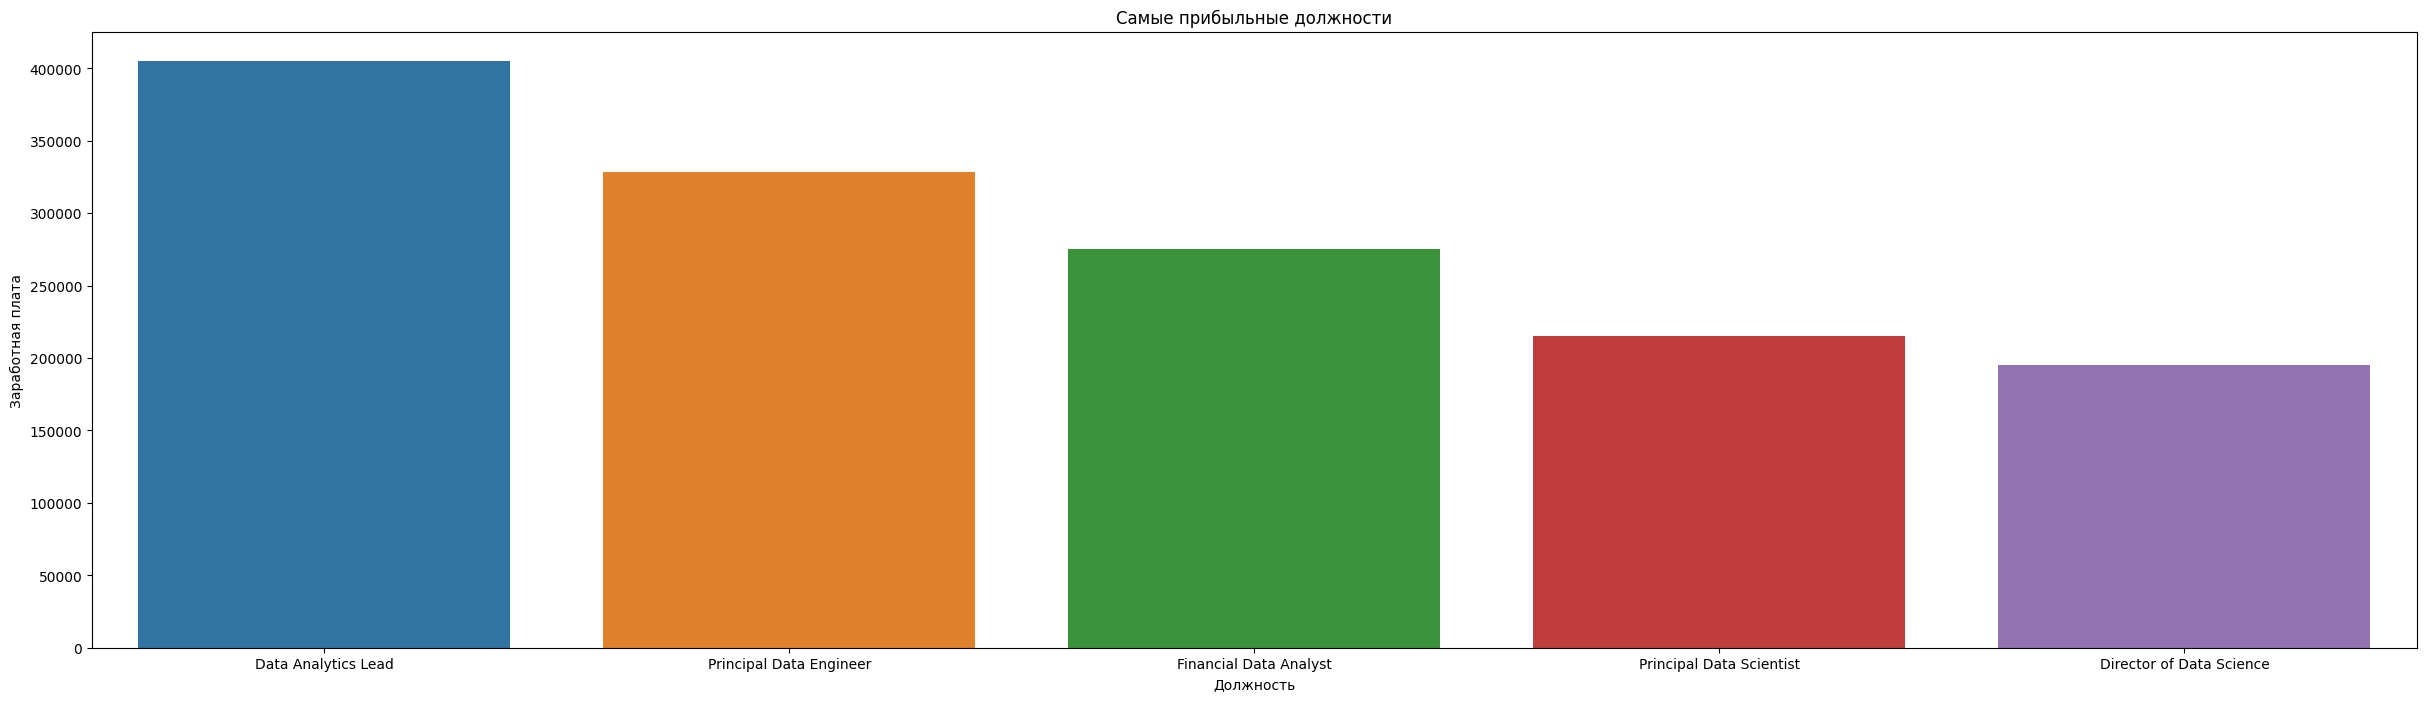

In [25]:
top_salary = df.pivot_table(index = 'job_title', 
                values = 'salary_in_usd', 
                aggfunc = 'mean').sort_values(by = ['salary_in_usd', 'job_title'], ascending = [ False , True ]).head(5)
plt.figure(figsize=(30,8))
sns.barplot(x = top_salary.index, y = top_salary['salary_in_usd'])
plt.title('Самые прибыльные должности')
plt.xlabel('Должность')
plt.ylabel('Заработная плата')

Text(0, 0.5, 'Заработная плата')

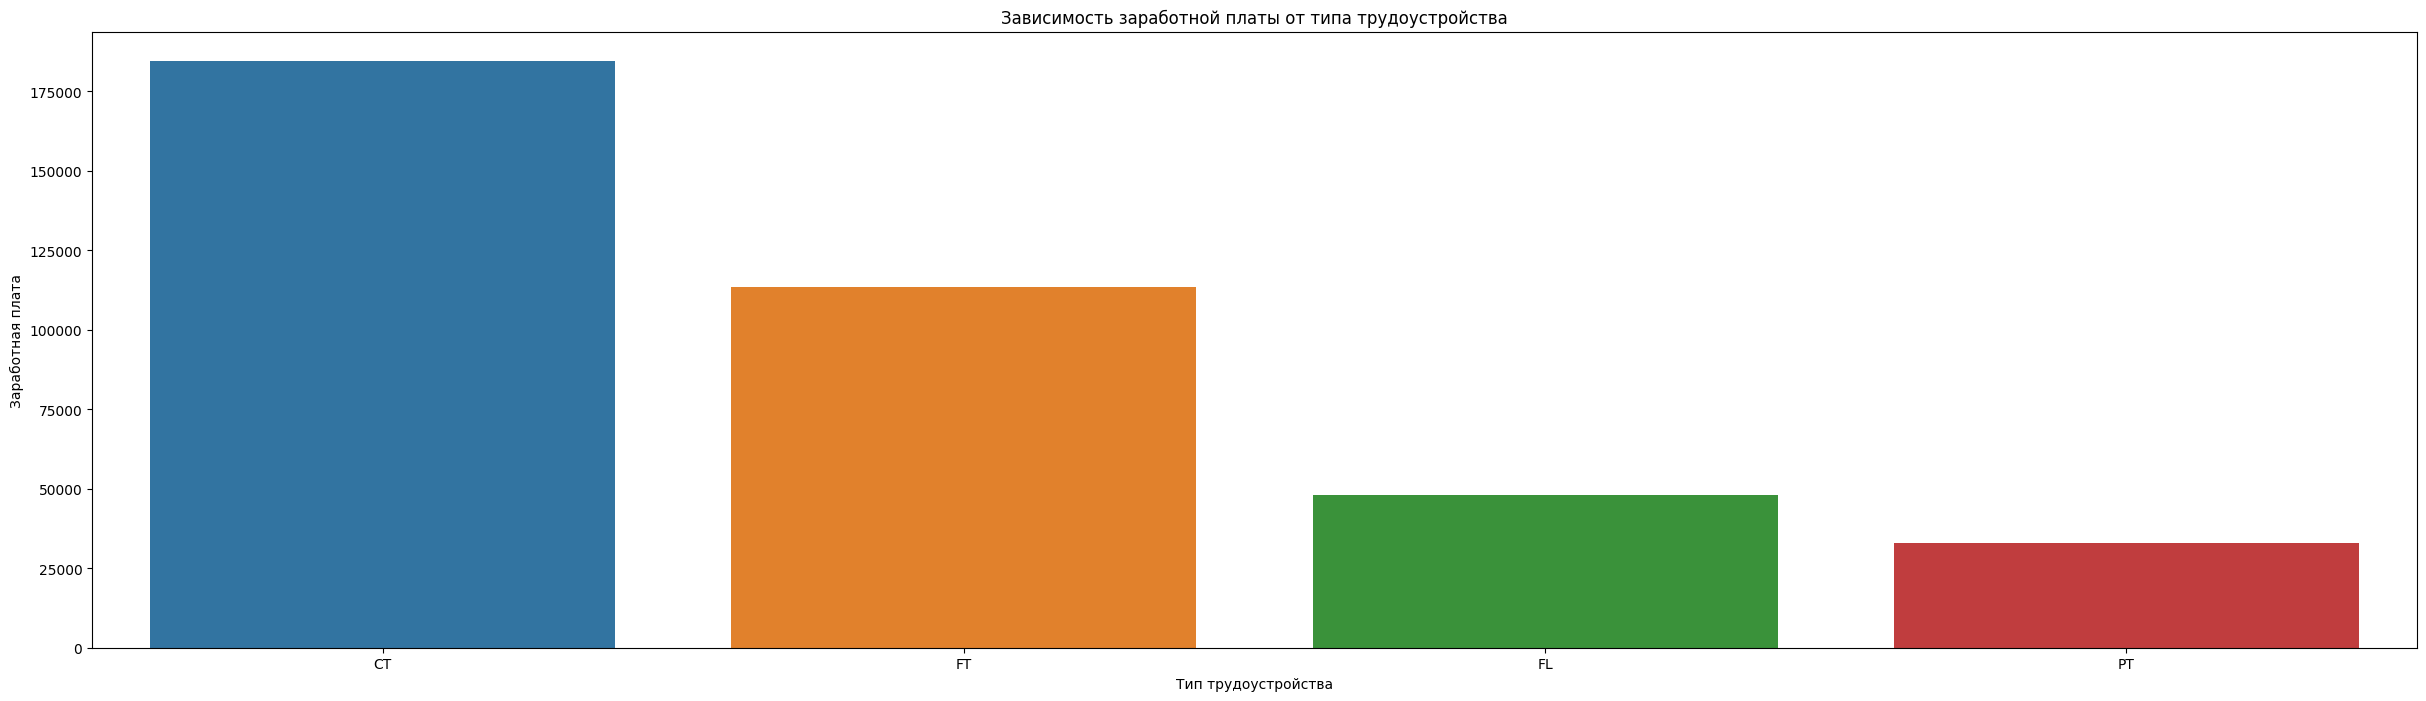

In [26]:
top_salary = df.pivot_table(index = 'employment_type', 
                values = 'salary_in_usd', 
                aggfunc = 'mean').sort_values(by = ['salary_in_usd', 'employment_type'], ascending = [ False , True ]).head(5)
plt.figure(figsize=(30,8))
sns.barplot(x = top_salary.index, y = top_salary['salary_in_usd'])
plt.title('Зависимость заработной платы от типа трудоустройства')
plt.xlabel('Тип трудоустройства')
plt.ylabel('Заработная плата')

Text(0, 0.5, 'Заработная плата')

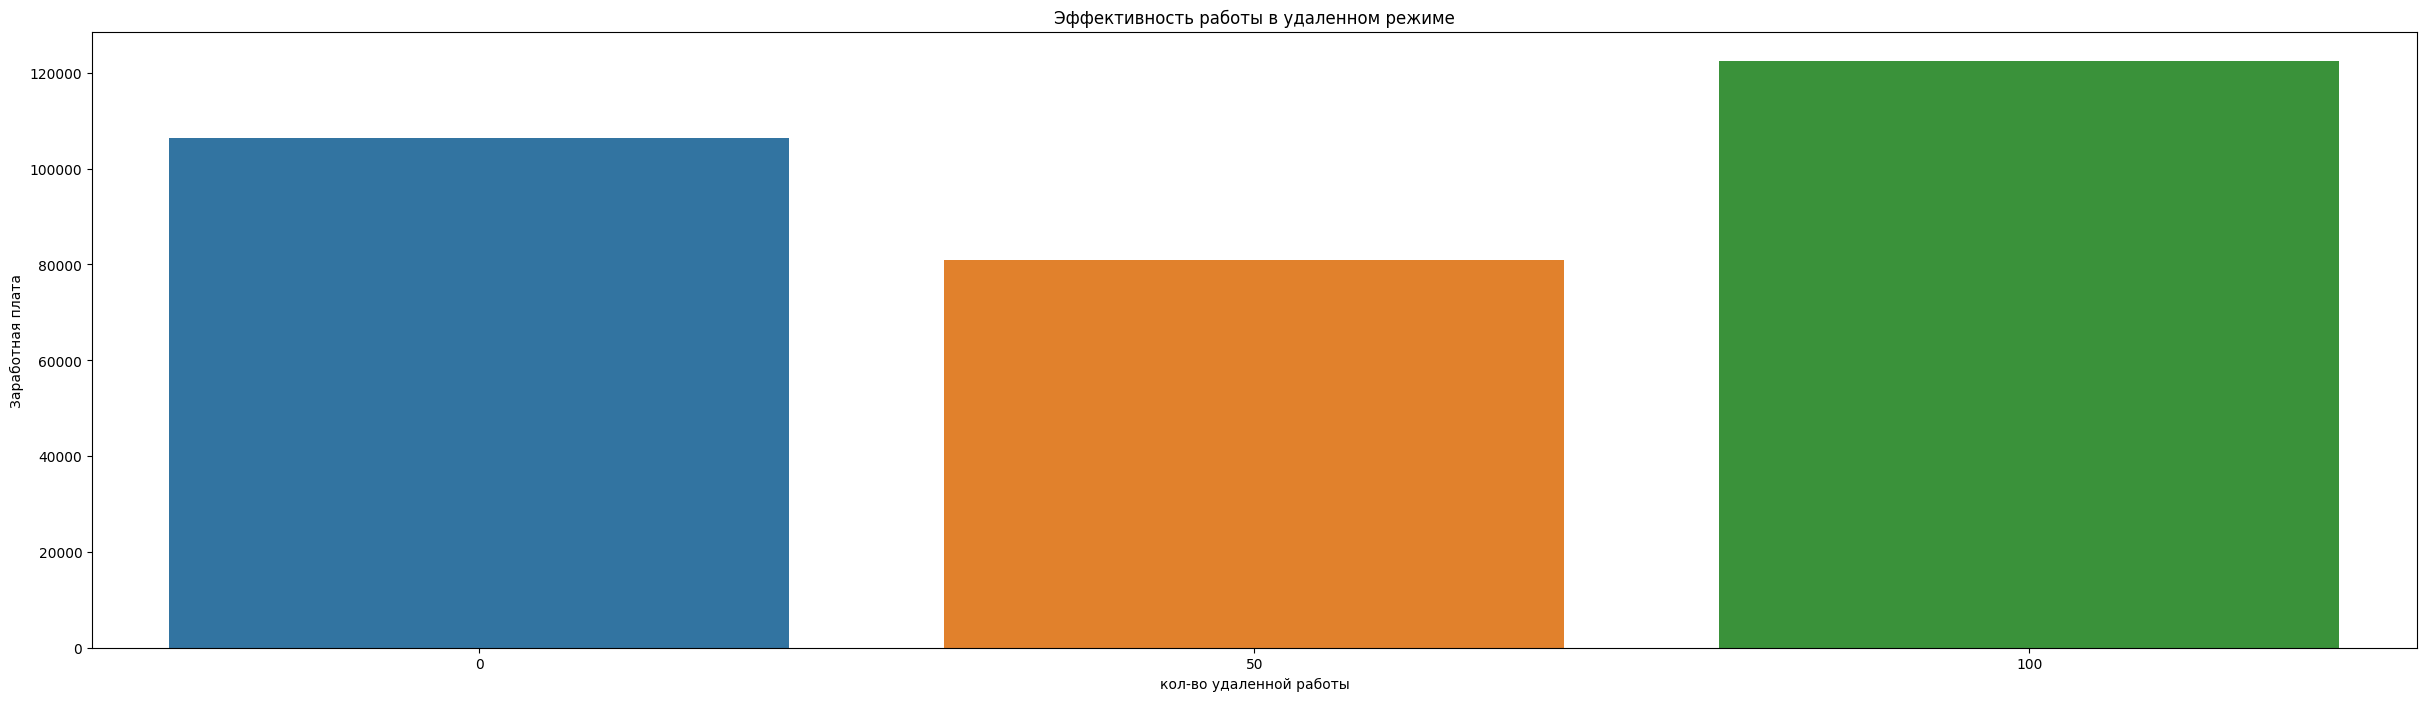

In [27]:
top_salary = df.pivot_table(index = 'remote_ratio', 
                values = 'salary_in_usd', 
                aggfunc = 'mean').sort_values(by = ['salary_in_usd', 'remote_ratio'], ascending = [ False , True ]).head(5)
plt.figure(figsize=(30,8))
sns.barplot(x = top_salary.index, y = top_salary['salary_in_usd'])
plt.title('Эффективность работы в удаленном режиме')
plt.xlabel('кол-во удаленной работы')
plt.ylabel('Заработная плата')

Text(0, 0.5, 'Заработная плата')

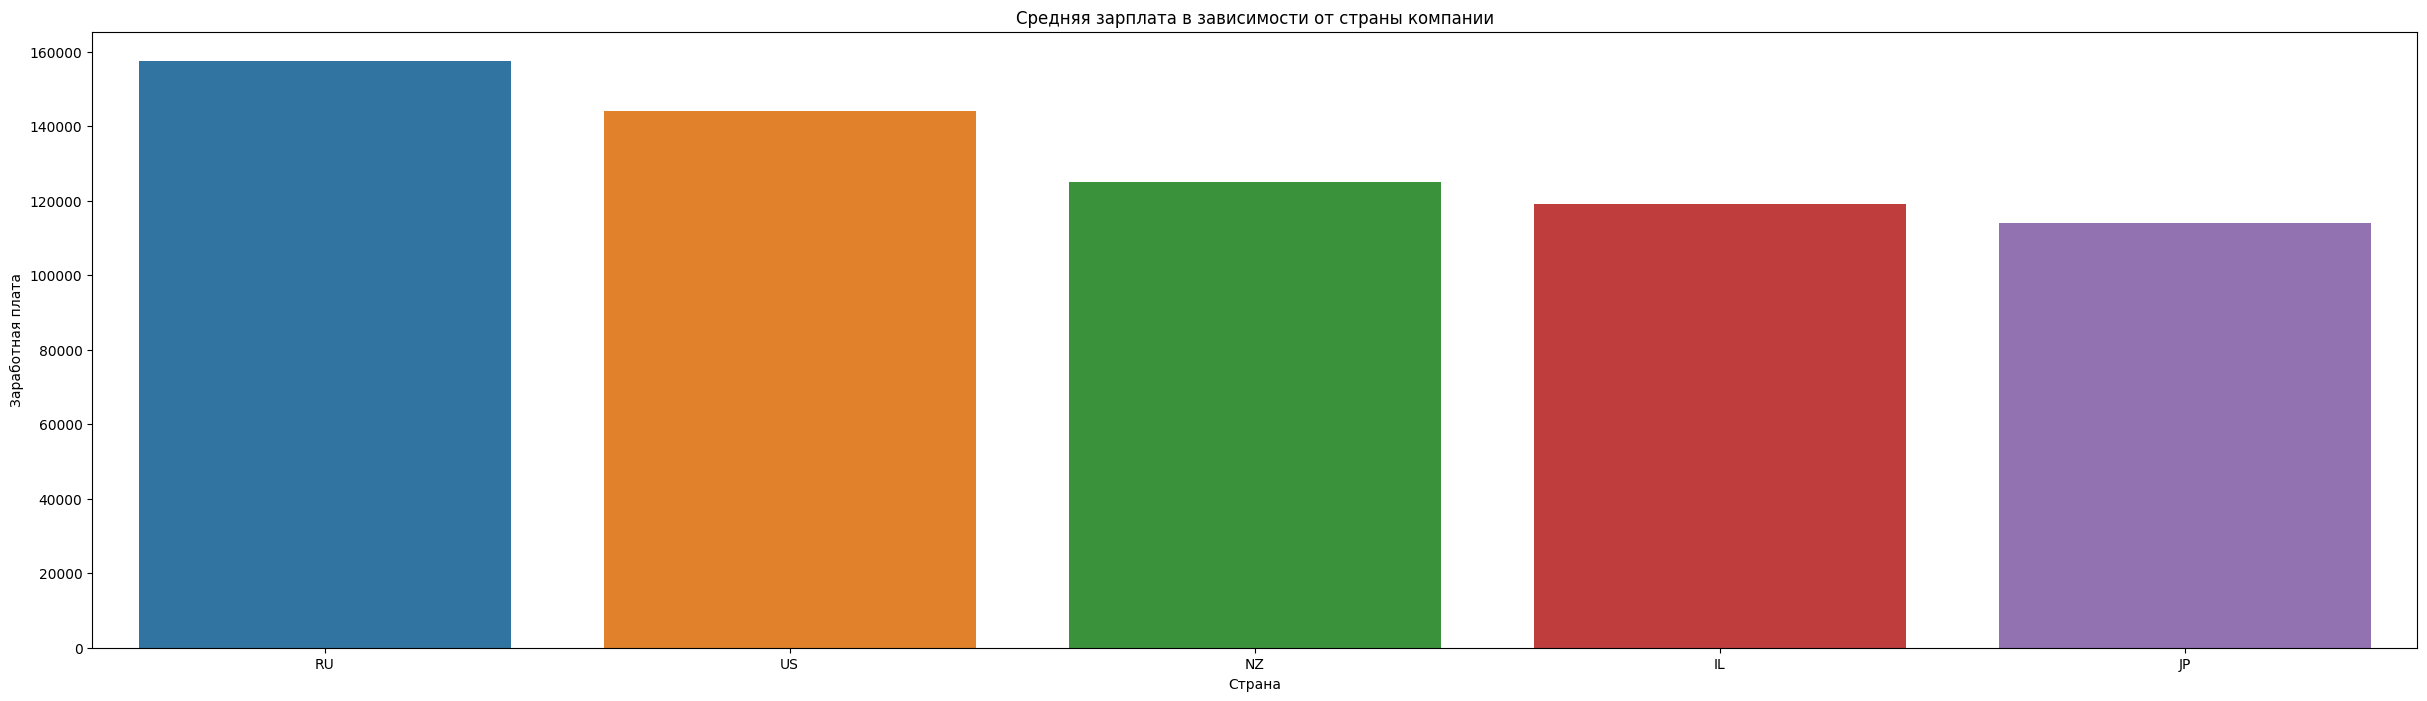

In [28]:
top_salary = df.pivot_table(index = 'company_location', 
                values = 'salary_in_usd', 
                aggfunc = 'mean').sort_values(by = ['salary_in_usd', 'company_location'], ascending = [ False , True ]).head(5)
plt.figure(figsize=(30,8))
sns.barplot(x = top_salary.index, y = top_salary['salary_in_usd'])
plt.title('Средняя зарплата в зависимости от страны компании')
plt.xlabel('Страна')
plt.ylabel('Заработная плата')

Text(0, 0.5, 'Заработная плата')

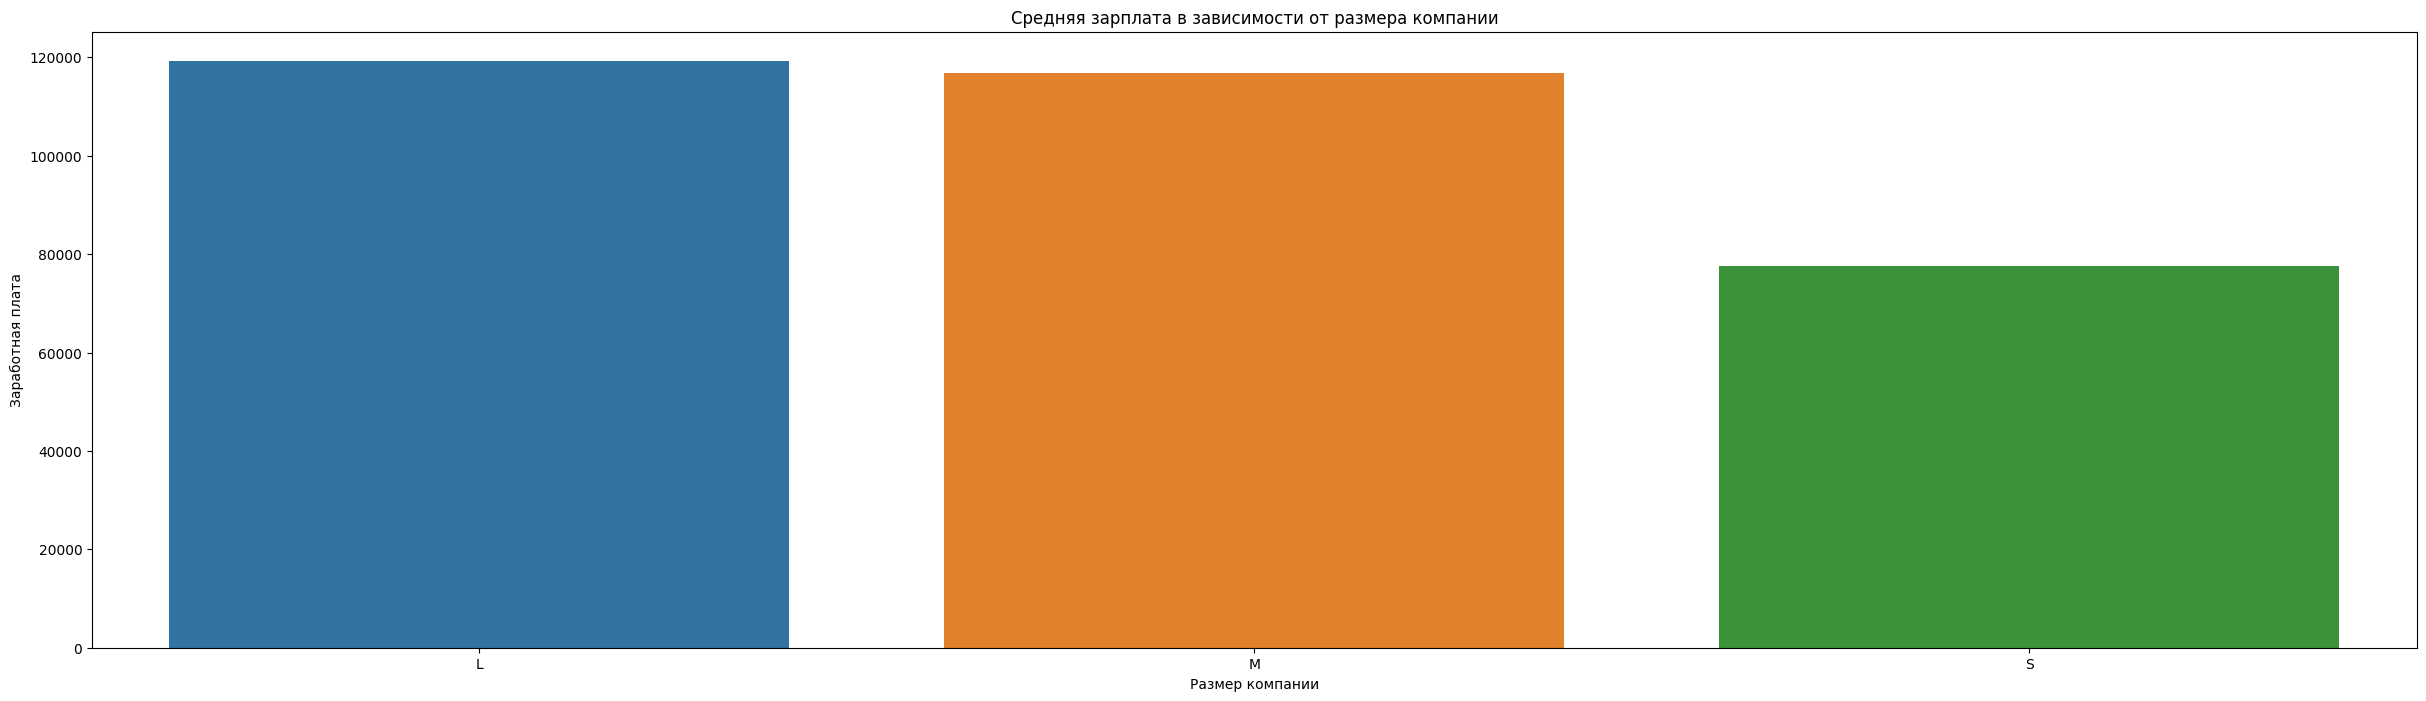

In [29]:
top_salary = df.pivot_table(index = 'company_size', 
                values = 'salary_in_usd', 
                aggfunc = 'mean').sort_values(by = ['salary_in_usd', 'company_size'], ascending = [ False , True ]).head(5)
plt.figure(figsize=(30,8))
sns.barplot(x = top_salary.index, y = top_salary['salary_in_usd'])
plt.title('Средняя зарплата в зависимости от размера компании')
plt.xlabel('Размер компании')
plt.ylabel('Заработная плата')

Text(0, 0.5, 'Заработная плата')

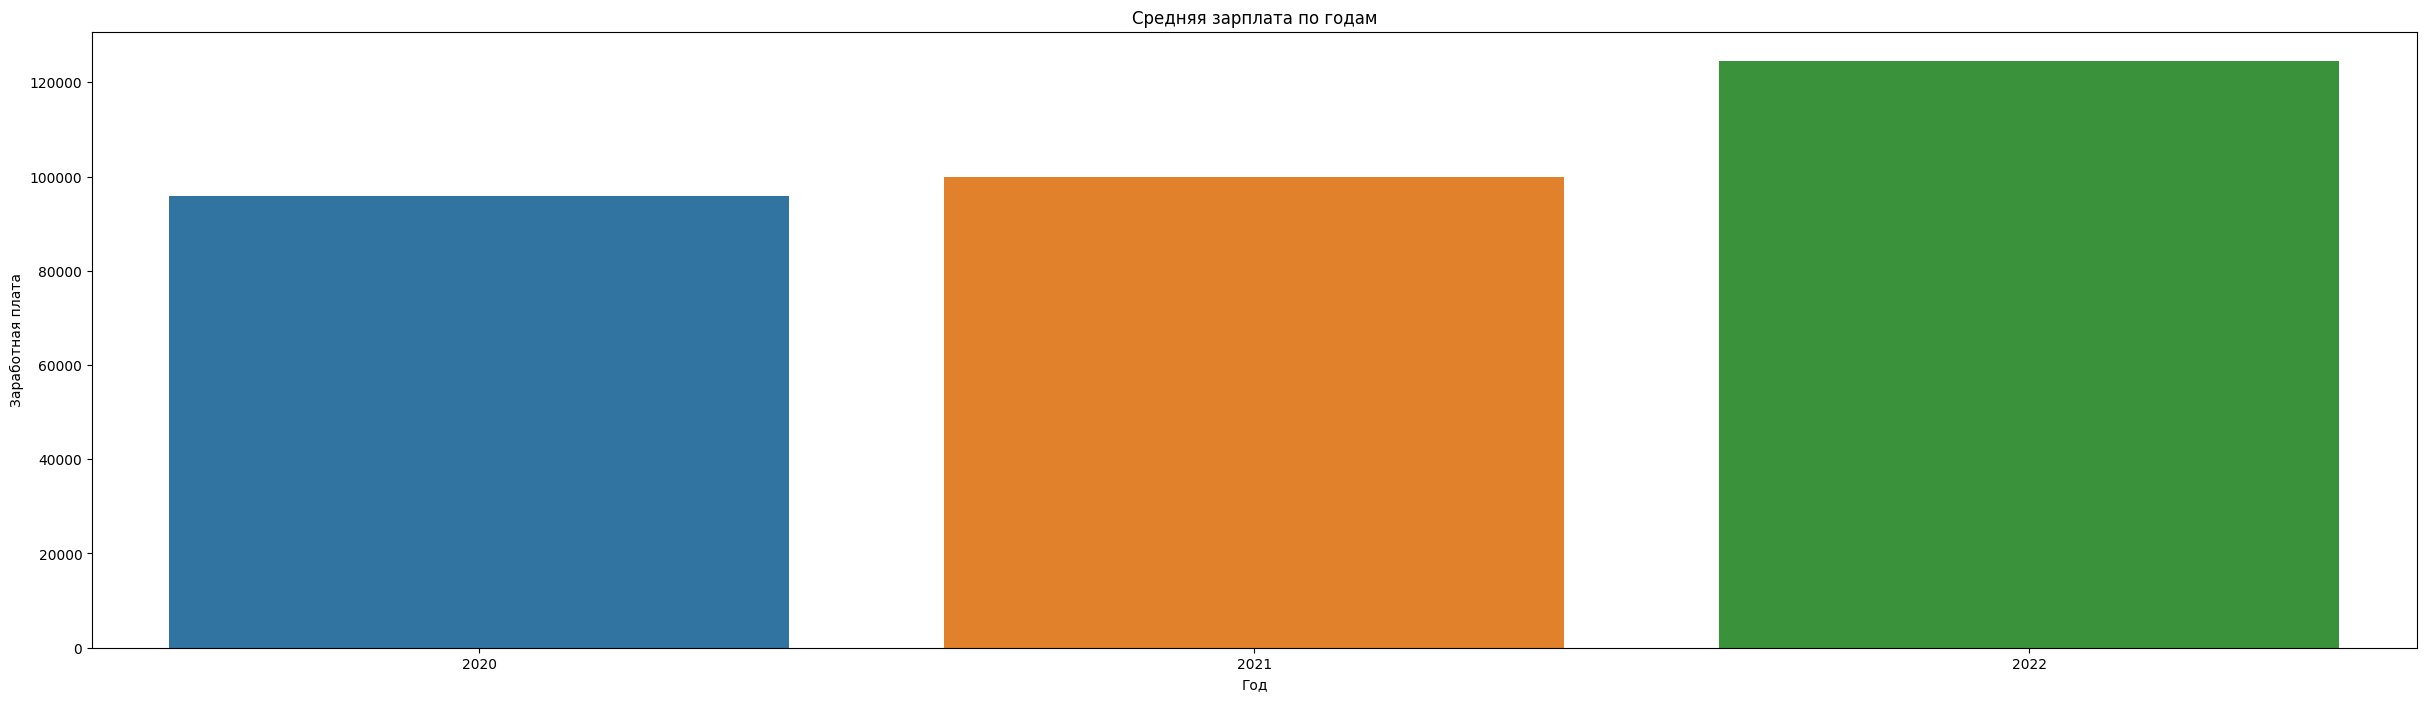

In [30]:
top_salary = df.pivot_table(index = 'work_year', 
                values = 'salary_in_usd', 
                aggfunc = 'mean').sort_values(by = ['salary_in_usd', 'work_year'], ascending = [ False , True ]).head(5)
plt.figure(figsize=(30,8))
sns.barplot(x = top_salary.index, y = top_salary['salary_in_usd'])
plt.title('Средняя зарплата по годам')
plt.xlabel('Год')
plt.ylabel('Заработная плата')

C:\Users\Scare\AppData\Local\Temp\ipykernel_18360\4045356483.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



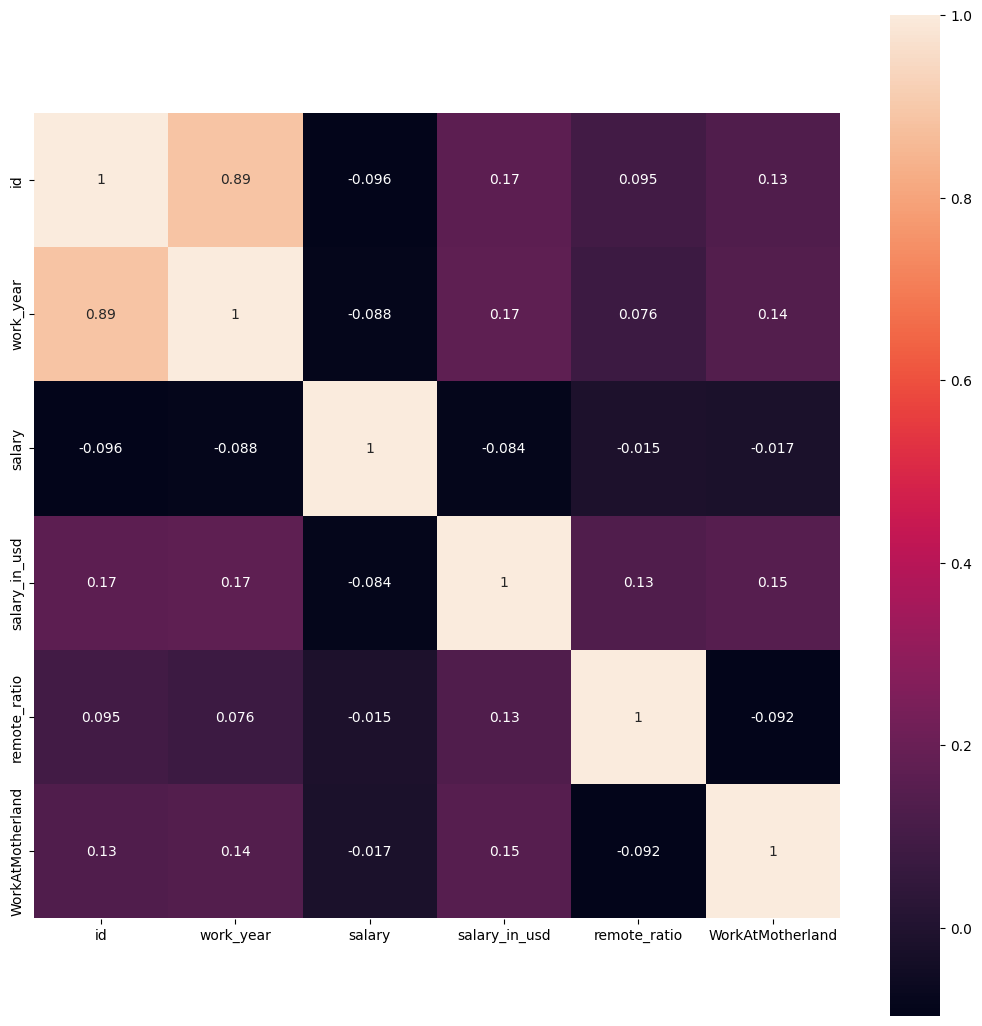

In [31]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(), annot=True, fmt='.2g',square=True, ax=ax);
